# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 14. Into the grid with rasters </h1>
</span>

In [1]:
#14-00
# Settings

# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Part II"


<span style="color:green;"> 
    <h2> 14.1. Types of raster data </h2>
</span>

<span style="color:green;"> 
    <h2> 14.2. Types of raster files </h2>
</span>

<span style="color:green;"> 
    <h2> 14.3. Reading and writing raster data </h2>
</span>

<span style="color:green;"> 
    <h2> 14.4. Converting between raster types </h2>
</span>

<span style="color:green;"> 
    <h2> 14.5. Retrieving elevation </h2>
</span>

In [2]:
#14-01
# Load the libraries
library(elevatr)
library(sf)

# Define a location
location = data.frame(lng = -7.9072, lat = 38.5725)
location_sf = st_as_sf(location, coords = c("lng","lat"), crs=4326)

# Retrieve elevation data for the location
elevation = get_elev_point(locations = location_sf, units= "meters" ,src = "aws")

# View the elevation in metres
elevation$elevation

elevatr v0.99.0 NOTE: Version 0.99.0 of 'elevatr' uses 'sf' and 'terra'.  Use 
of the 'sp', 'raster', and underlying 'rgdal' packages by 'elevatr' is being 
deprecated; however, get_elev_raster continues to return a RasterLayer.  This 
will be dropped in future versions, so please plan accordingly.

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Mosaicing & Projecting

Note: Elevation units are in meters



[1] 276

Loading required package: sp

Mosaicing & Projecting

Note: Elevation units are in meters.



[1] "RasterLayer"
attr(,"package")
[1] "raster"

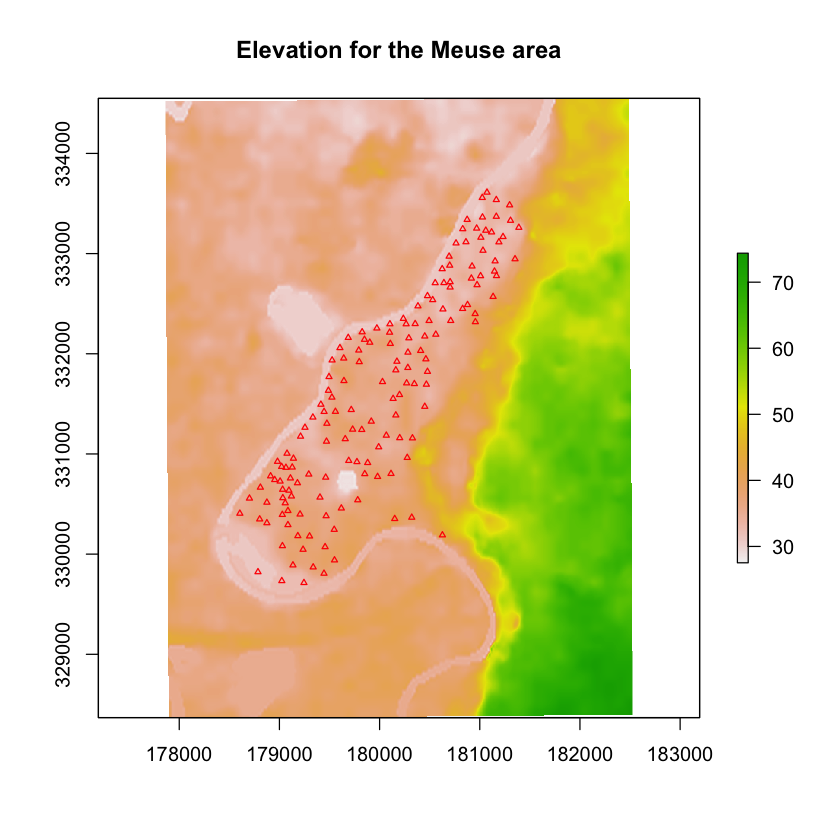

In [3]:
#14-02
# Load the library
library(elevatr)
library(raster)
library(sf)

# Retrieve the data
data(meuse.grid)
data(meuse)

# Convert the meuse.grid data to an ‘sf’ object
sf_meuse.grid = st_as_sf(meuse.grid, coords = c("x", "y"))

# Assign the CRS to the ‘sf’ object
st_crs(sf_meuse.grid) = st_crs(28992)

# Create a raster from the meuse grid data
meuse_raster = raster(sf_meuse.grid)

# Retrieve elevation data for a larger region
elevation = get_elev_raster(meuse_raster, units= "meters" , src = "aws", z = 14)

# Verify the data type
class(elevation)

# View the results
plot(elevation, main = "Elevation for the Meuse area")
points(meuse, pch = 2, cex = 0.5, col = "red")

<span style="color:green;"> 
    <h2> 14.6. Retrieving bathymetry </h2>
</span>

In [4]:
#14-03/01
# Download and install the necessary libraries
library(EMODnetWCS)

Loading ISO 19139 XML schemas...

Loading ISO 19115 codelists...



In [5]:
#14-02/02
# Verify the WCS server data availability
emdn_wcs()

service_name,service_url
<chr>,<chr>
bathymetry,https://ows.emodnet-bathymetry.eu/wcs
biology,https://geo.vliz.be/geoserver/Emodnetbio/wcs
human_activities,https://ows.emodnet-humanactivities.eu/wcs
physics,https://geoserver.emodnet-physics.eu/geoserver/wcs
seabed_habitats,https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open_maplibrary/wcs


In [6]:
#14-03/03
# Initiate the client
wcs = emdn_init_wcs_client(service = "bathymetry")

# Retrieve the client information
emdn_get_wcs_info(wcs)

✔ WCS client created succesfully

ℹ Service: <https://ows.emodnet-bathymetry.eu/wcs>

ℹ Service: "2.0.1"



coverage_id,dim_n,dim_names,extent,crs,wgs84_bbox,temporal_extent,vertical_extent,subtype
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
emodnet__mean,2,lat(deg):geographic; long(deg):geographic,"-70.5, 11, 43, 90",EPSG:4326,"-70.5, 11, 43, 90",NA,NA,RectifiedGridCoverage
emodnet__mean_2016,2,lat(deg):geographic; long(deg):geographic,"-36, 25, 43, 85",EPSG:4326,"-36, 25, 43, 85",NA,NA,RectifiedGridCoverage
emodnet__mean_2018,2,lat(deg):geographic; long(deg):geographic,"-36, 15, 43, 90",EPSG:4326,"-36, 15, 43, 90",NA,NA,RectifiedGridCoverage
emodnet__mean_2020,2,lat(deg):geographic; long(deg):geographic,"-36, 15, 43, 90",EPSG:4326,"-36, 15, 43, 90",NA,NA,RectifiedGridCoverage
emodnet__mean_atlas_land,2,lat(deg):geographic; long(deg):geographic,"-73.12, 5.62, 45, 90",EPSG:4326,"-73.12, 5.62, 45, 90",NA,NA,RectifiedGridCoverage
emodnet__mean_multicolour,2,lat(deg):geographic; long(deg):geographic,"-73.12, 5.62, 45, 90",EPSG:4326,"-73.12, 5.62, 45, 90",NA,NA,RectifiedGridCoverage
emodnet__mean_rainbowcolour,2,lat(deg):geographic; long(deg):geographic,"-73.12, 5.62, 45, 90",EPSG:4326,"-73.12, 5.62, 45, 90",NA,NA,RectifiedGridCoverage


In [8]:
#14-03/04
# Retrieve the coverage information
emdn_get_coverage_ids(wcs)

[1] "emodnet__mean"               "emodnet__mean_2016"         
[3] "emodnet__mean_2018"          "emodnet__mean_2020"         
[5] "emodnet__mean_atlas_land"    "emodnet__mean_multicolour"  
[7] "emodnet__mean_rainbowcolour"

In [9]:
#14-03/05
# Extract bathymetric data from the Pico island
pico_bath = emdn_get_coverage(wcs,
    coverage_id = "emodnet__mean",
    bbox = c(xmin = -29,
    ymin = 38,
    xmax = -27.5,
    ymax = 39),
    nil_values_as_na = TRUE )

── Downloading coverage "emodnet__mean" ────────────────────────────────────────────────────────────────



<GMLEnvelope>
....|-- lowerCorner: 38 -29
....|-- upperCorner: 39 -27.5



✔ Coverage "emodnet__mean" downloaded succesfully as a
       terra <SpatRaster>

✔ nil values NA converted to NA on all bands.



[1] "SpatRaster"
attr(,"package")
[1] "terra"

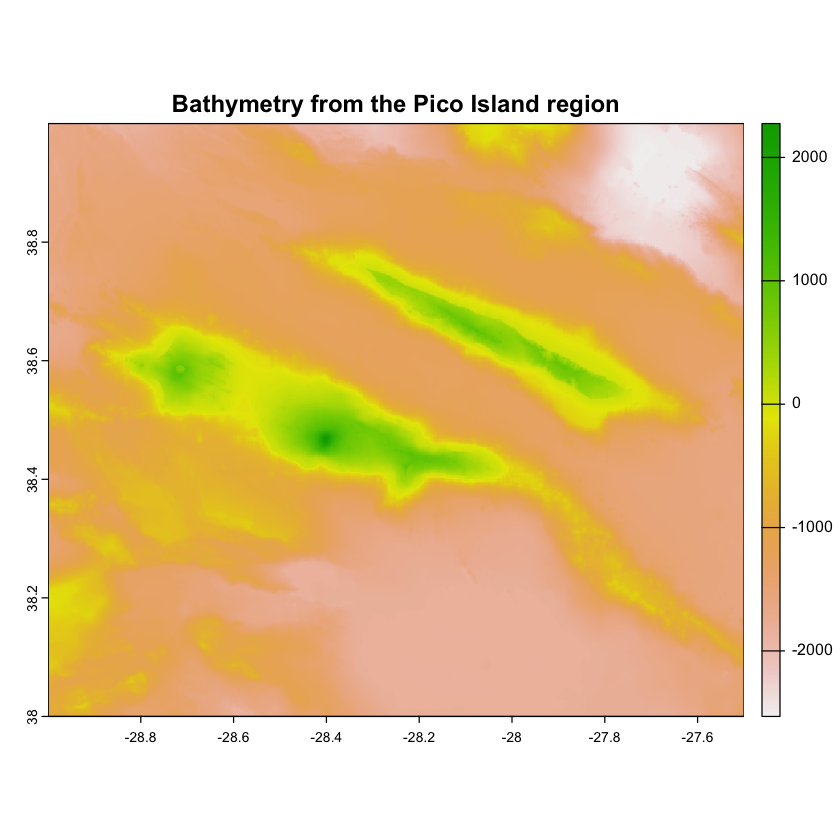

In [10]:
#14-03/06
# Verify the data type
class(pico_bath)

# Plot the results
plot(pico_bath, main = "Bathymetry from the Pico Island region")

In [12]:
#14-04/01
# Load the libraries
library(EMODnetWFS)
library(terra)
library(tidyterra)
library(sf)
library(ggplot2)

# List the services
wfs_services = emodnet_wfs()
wfs_services$service_name

[1] "bathymetry"                                                     
 [2] "biology"                                                        
 [3] "biology_occurrence_data"                                        
 [4] "chemistry_cdi_data_discovery_and_access_service"                
 [5] "chemistry_cdi_distribution_observations_per_category_and_region"
 [6] "chemistry_contaminants"                                         
 [7] "chemistry_marine_litter"                                        
 [8] "geology_coastal_behavior"                                       
 [9] "geology_events_and_probabilities"                               
[10] "geology_marine_minerals"                                        
[11] "geology_sea_floor_bedrock"                                      
[12] "geology_seabed_substrate_maps"                                  
[13] "geology_submerged_landscapes"                                   
[14] "human_activities"                                               
[15] "physics"                                                        
[16] "seabed_habitats_general_datasets_and_products"                  
[17] "seabed_habitats_individual_habitat_map_and_model_datasets"

In [13]:
#14-04/02
# Create new WFS Client. Specify the service geology marine minerals
wfs_geo = emodnet_init_wfs_client(service = "geology_marine_minerals")

# Retrieve the layers names
wfs_info = emodnet_get_wfs_info(wfs_geo)
wfs_info$layer_name

✔ WFS client created successfully

ℹ Service: "https://drive.emodnet-geology.eu/geoserver/gsi/wfs"

ℹ Version: "2.0.0"



[1] "MarineAggregatesArea"                "MarineAggregatesPoint"              
 [3] "MarineAggregatesSubDepArea"          "MarineAggregatesSubDepPoint"        
 [5] "CobaltRichFerromanganeseCrustsArea"  "CobaltRichFerromanganeseCrustsPoint"
 [7] "EvaporitesArea"                      "EvaporitesPoint"                    
 [9] "GasHydratesArea"                     "GasHydratesPoint"                   
[11] "MarineHydrocarbonsArea"              "MarineHydrocarbonsPoint"            
[13] "MarineHydrocarbonsSubDepArea"        "MarineHydrocarbonsSubDepPoint"      
[15] "MarinePlacerDepositsArea"            "MarinePlacerDepositsPoint"          
[17] "MarineSapropelArea"                  "MarineSapropelPoint"                
[19] "MetalRichSedimentsArea"              "MetalRichSedimentsPoint"            
[21] "PhosphoritesArea"                    "PhosphoritesPoint"                  
[23] "PolymetallicNodulesArea"             "PolymetallicNodulesPoint"           
[25] "PolymetallicSulphidesPoint"          "RockPegVeinArea"                    
[27] "RockPegVeinPoint"

In [14]:
#14-04/03
# Define the working layer (or layers)
layers = c("PolymetallicSulphidesPoint")

# Get layer info
emodnet_get_layer_info(wfs = wfs_geo, layers = layers)

# Retrieve the layer
MAR_minerals = emodnet_get_layers(wfs = wfs_geo, layers = layers, crs=4326)
mineral = MAR_minerals[[1]]

data_source,service_name,service_url,layer_name,title,abstract,class,format,layer_namespace
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
emodnet_wfs,https://drive.emodnet-geology.eu/geoserver/gsi/wfs,geology_marine_minerals,PolymetallicSulphidesPoint,Polymetallic Sulphides,"The GSI, as partner and Work Package 7 Minerals leader of EMODnet Geology Phase II, are compiling information on Polymetallic sulphides PMS. EMODnet partners are submitting mapped PMS locations and existing information, here you can view data collated thus far. The PMS information presented here are of mapped PMS locations. Also known as Volcanogenic Massive Sulfides (VMS), Seafloor Massive Sulfides (SMS) and Black Smokers, PMS are base metal sulfur-rich mineral deposits. They occur along the earth’s major tectonic belts at spreading centres, as well as in intraplate regions where islands and seamounts are formed.",WFSFeatureType,sf,gsi


ℹ crs transformed to 4326.



In [15]:
#14-04/04
# Retrieve the Madeira-Tore study area
MAR_bath = emdn_get_coverage(wcs,
    coverage_id = "emodnet__mean",
    bbox = c(xmin = -34,
    ymin = 36,
    xmax = -30,
    ymax = 39),
    nil_values_as_na = TRUE)

# Give name for the pixel value = depth
names(MAR_bath) = "depth"

── Downloading coverage "emodnet__mean" ────────────────────────────────────────────────────────────────



<GMLEnvelope>
....|-- lowerCorner: 36 -34
....|-- upperCorner: 39 -30



✔ Coverage "emodnet__mean" downloaded succesfully as a
       terra <SpatRaster>

✔ nil values NA converted to NA on all bands.



In [16]:
#14-04/05
# Select and crop the layer
mineral_poly = st_crop(mineral, st_bbox(MAR_bath))

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


<SpatRaster> resampled to 500821 cells for plotting


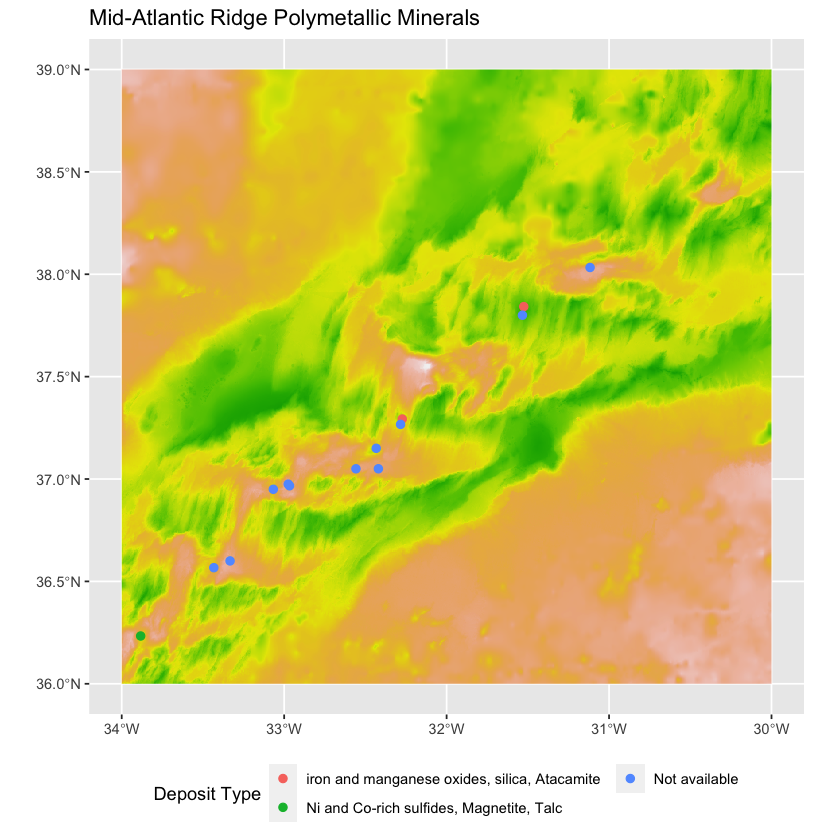

In [17]:
#14-04/06

# Plot the bathymetry data using ggplot2 and tidyterra
ggplot() +
    geom_spatraster(data = MAR_bath, aes(fill = depth), show.legend = FALSE) +
    geom_sf(data=mineral_poly, aes(color=all_other), size = 2) +
    scale_fill_gradientn(colors = rev(terrain.colors(255)), na.value = "black") +
    scale_size_identity() +
    coord_sf(datum = 4326) +
    labs(title = "Mid-Atlantic Ridge Polymetallic Minerals") +
    theme(legend.position = "bottom", legend.box = "horizontal", legend.justification = "center") +
    guides(color = guide_legend(title = "Deposit Type", nrow = 2))

<span style="color:green;"> 
    <h2> 14.7. Know your data, again </h2>
</span>

In [18]:
#14-05
# Retrieve information about the spatRaster object
ext(MAR_bath)
res(MAR_bath)
ncell(MAR_bath)
crs(MAR_bath)

SpatExtent : -34, -30, 36, 39 (xmin, xmax, ymin, ymax)

[1] 0.001041667 0.001041667

[1] 11059200

[1] "GEOGCRS[\"WGS 84\",\n    ENSEMBLE[\"World Geodetic System 1984 ensemble\",\n        MEMBER[\"World Geodetic System 1984 (Transit)\"],\n        MEMBER[\"World Geodetic System 1984 (G730)\"],\n        MEMBER[\"World Geodetic System 1984 (G873)\"],\n        MEMBER[\"World Geodetic System 1984 (G1150)\"],\n        MEMBER[\"World Geodetic System 1984 (G1674)\"],\n        MEMBER[\"World Geodetic System 1984 (G1762)\"],\n        MEMBER[\"World Geodetic System 1984 (G2139)\"],\n        ELLIPSOID[\"WGS 84\",6378137,298.257223563,\n            LENGTHUNIT[\"metre\",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM[\"Greenwich\",0,\n        ANGLEUNIT[\"degree\",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS[\"geodetic latitude (Lat)\",north,\n            ORDER[1],\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n        AXIS[\"geodetic longitude (Lon)\",east,\n            ORDER[2],\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n    USAGE[\n        SCOPE[\"Horizontal component of 3D system.\"],\n        AREA[\"World.\"],\n        BBOX[-90,-180,90,180]],\n    ID[\"EPSG\",4326]]"

<span style="color:green;"> 
    <h2> 14.8. Basic descriptive statistics of a raster </h2>
</span>

In [19]:
#14-06
# Convert the raster to a matrix
meuse_matrix = as.matrix(elevation)

# Calculate descriptive statistics
meuse_mean = mean(meuse_matrix, na.rm = TRUE)
meuse_sd = sd(meuse_matrix, na.rm = TRUE)
meuse_min = min(meuse_matrix, na.rm = TRUE)
meuse_max = max(meuse_matrix, na.rm = TRUE)

# Print the results
cat("Mean:", meuse_mean, "\n")
cat("Standard deviation:", meuse_sd, "\n")
cat("Minimum value:", meuse_min, "\n")
cat("Maximum value:", meuse_max, "\n")

Mean: 42.17273 
Standard deviation: 10.60359 
Minimum value: 27.46826 
Maximum value: 74.40533 


<span style="color:blue;"> 
    <h1> References </h1>
</span>

> Klischies, M., Petersen, S., & Devey, C. W. (2019). Geological mapping of the Menez Gwen segment at 37 50′ N on the Mid-Atlantic Ridge: Implications for accretion mechanisms and associated hydrothermal activity at slow-spreading mid-ocean ridges. Marine Geology, 412, 107–122.